In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [4]:
def save_fig_acc(data):
    fig = plt.figure(figsize=(10,8),dpi=600)
    mo = pd.read_csv("mo_fitness_"+data+".csv")
    so = pd.read_csv("so_fitness"+data+".csv")
    imo = pd.read_csv("imo_fitness_"+data+".csv")
    # 需要添加一条INSGA2
    plt.plot(range(200),imo.values[:,1],linestyle = "-.",linewidth=3,label='INSGA-III-XGBoost')
    plt.plot(range(200),mo.values[:,1],linestyle = "-.",linewidth=3,label='NSGA-III-XGBoost')
    plt.plot(range(200),so.values[:,1],linestyle = "-.",linewidth=3,label='GA-XGBoost')
    
    if data=="DJIA":
        plt.title(u"道琼斯指数",size=24)
    elif data=="HangSeng":
        plt.title(u"恒生指数",size=24)
    else:
        plt.title(u"沪深300指数",size=24)

    plt.xticks(size=22)
    plt.yticks(size=22)
    plt.xlabel(u"进化代数",size=24)
    plt.ylabel("准确度",size=24)
    my_y_ticks = np.arange(0.82, 0.92, 0.01)
    plt.yticks(my_y_ticks)
    plt.legend(fontsize = 24)
    fig.savefig("./实验结果/"+data+".pdf",dpi=600)

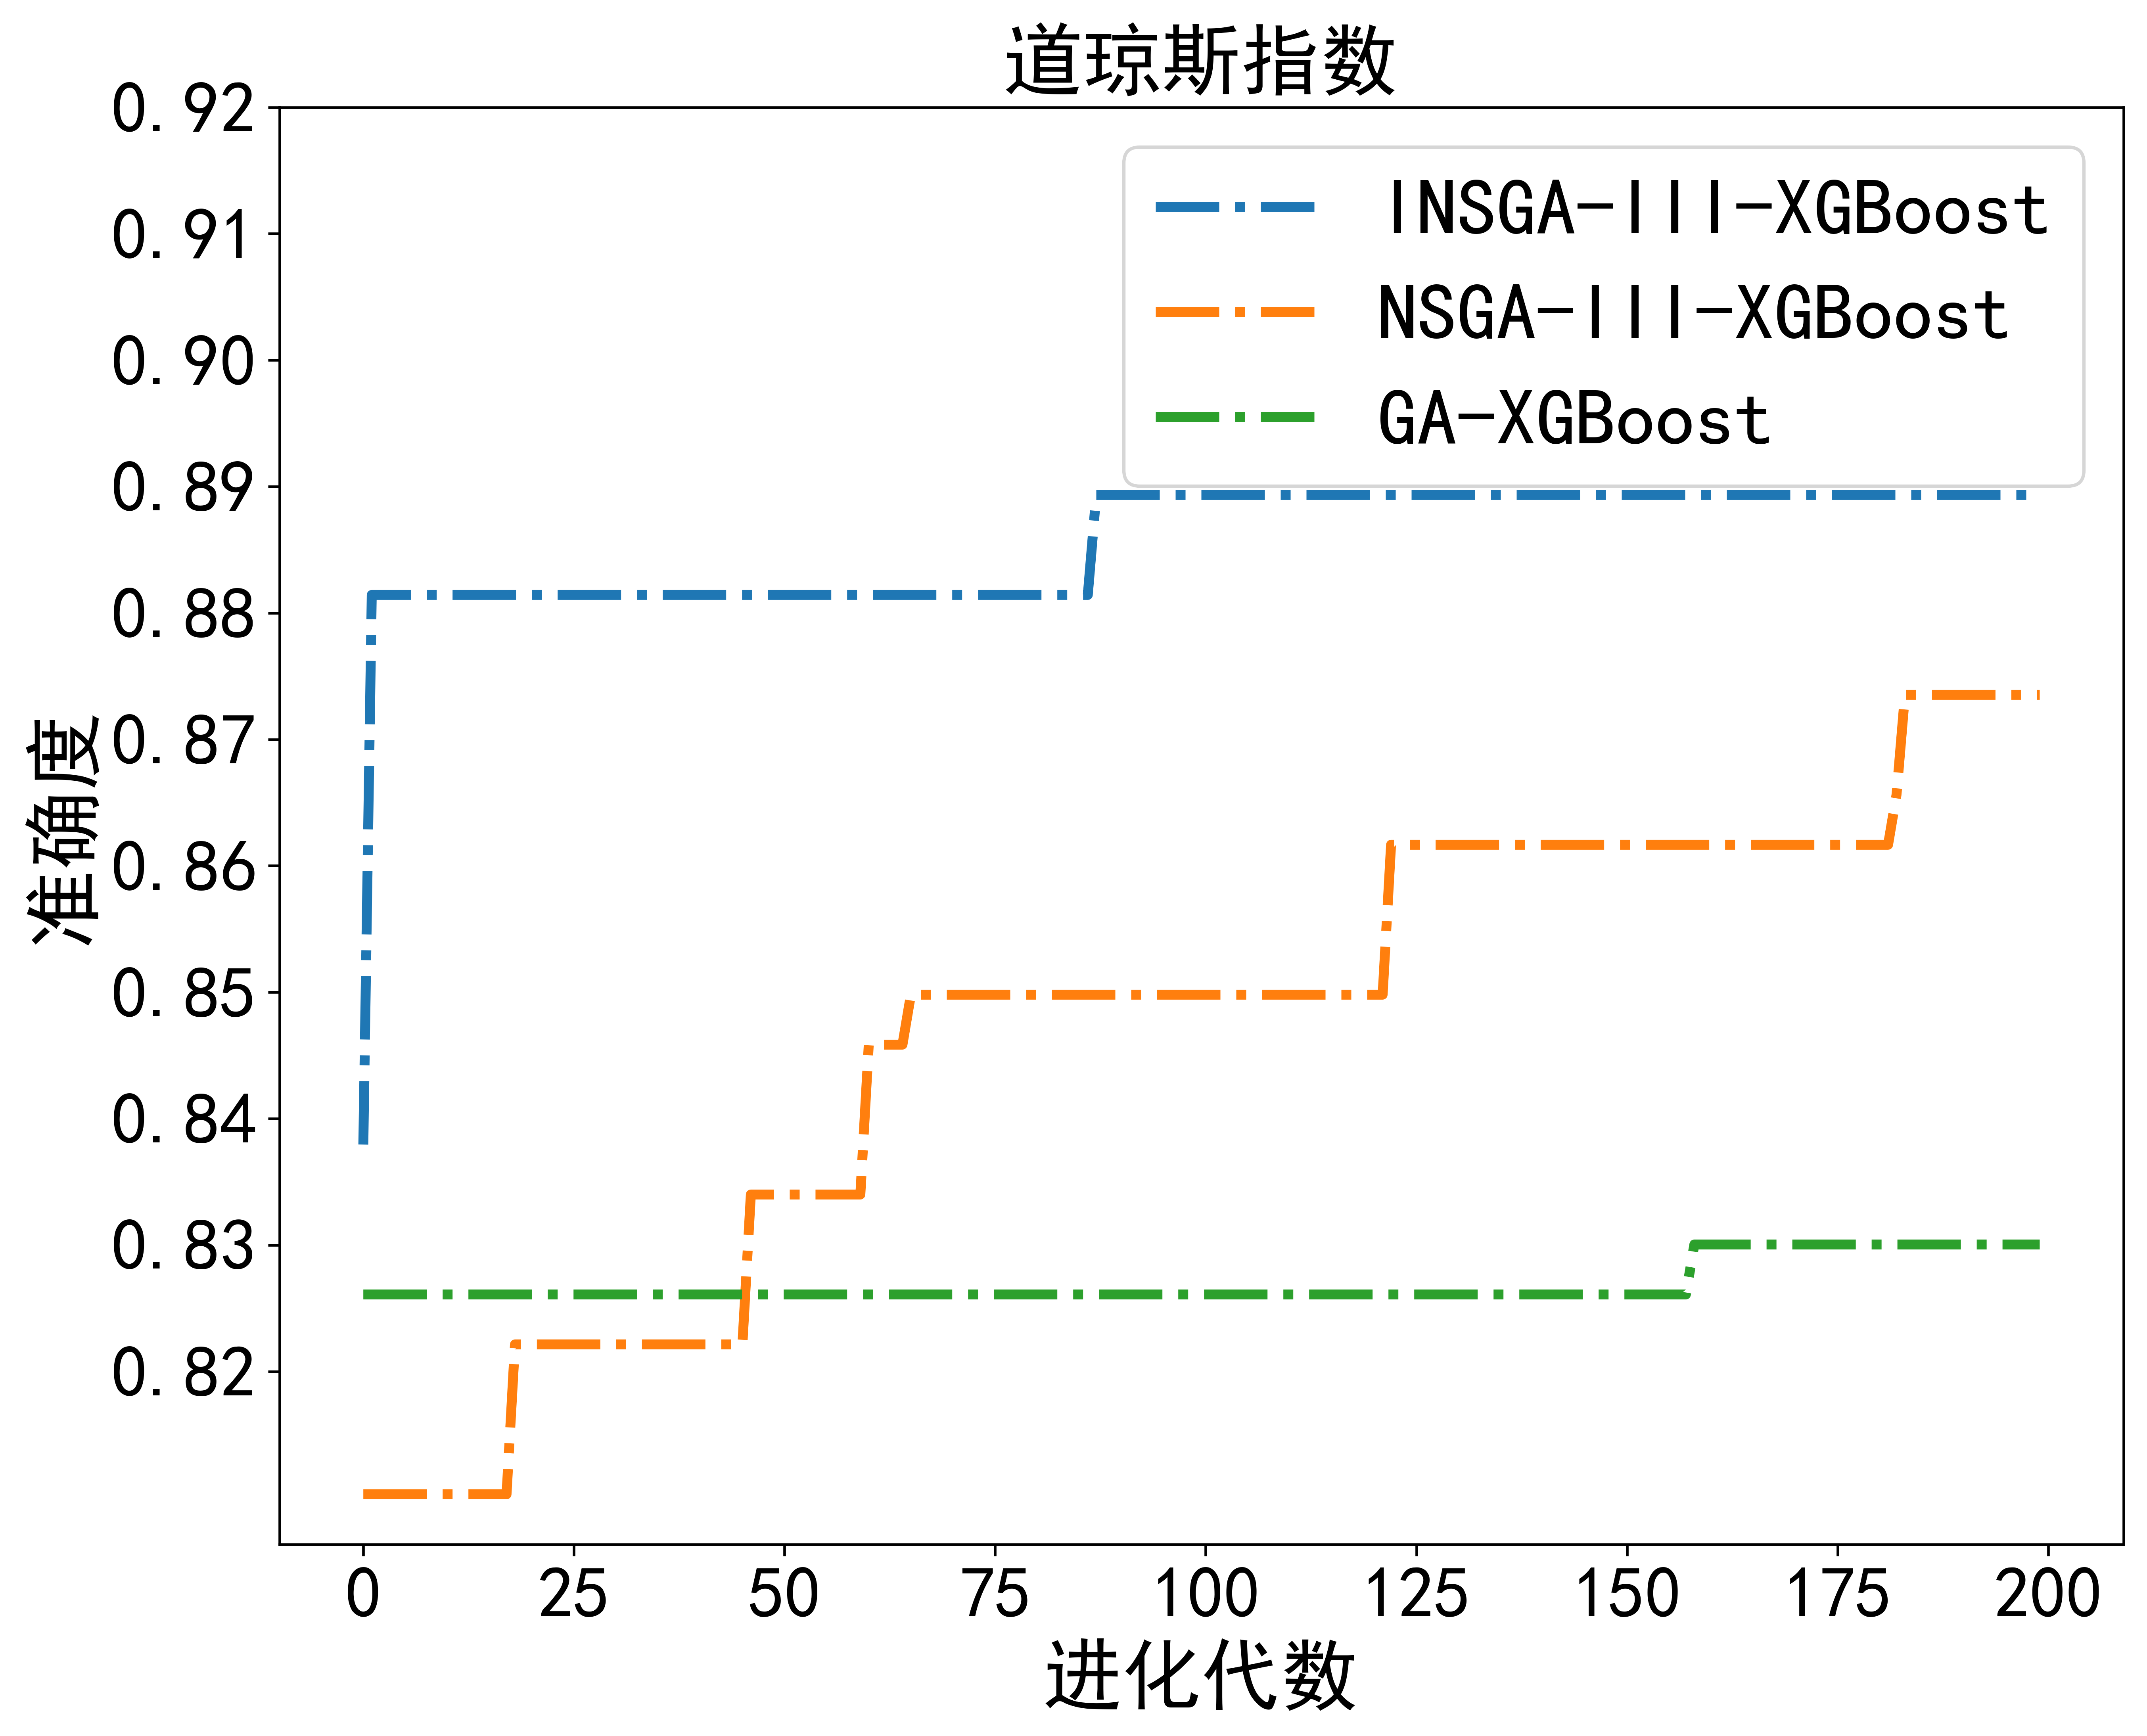

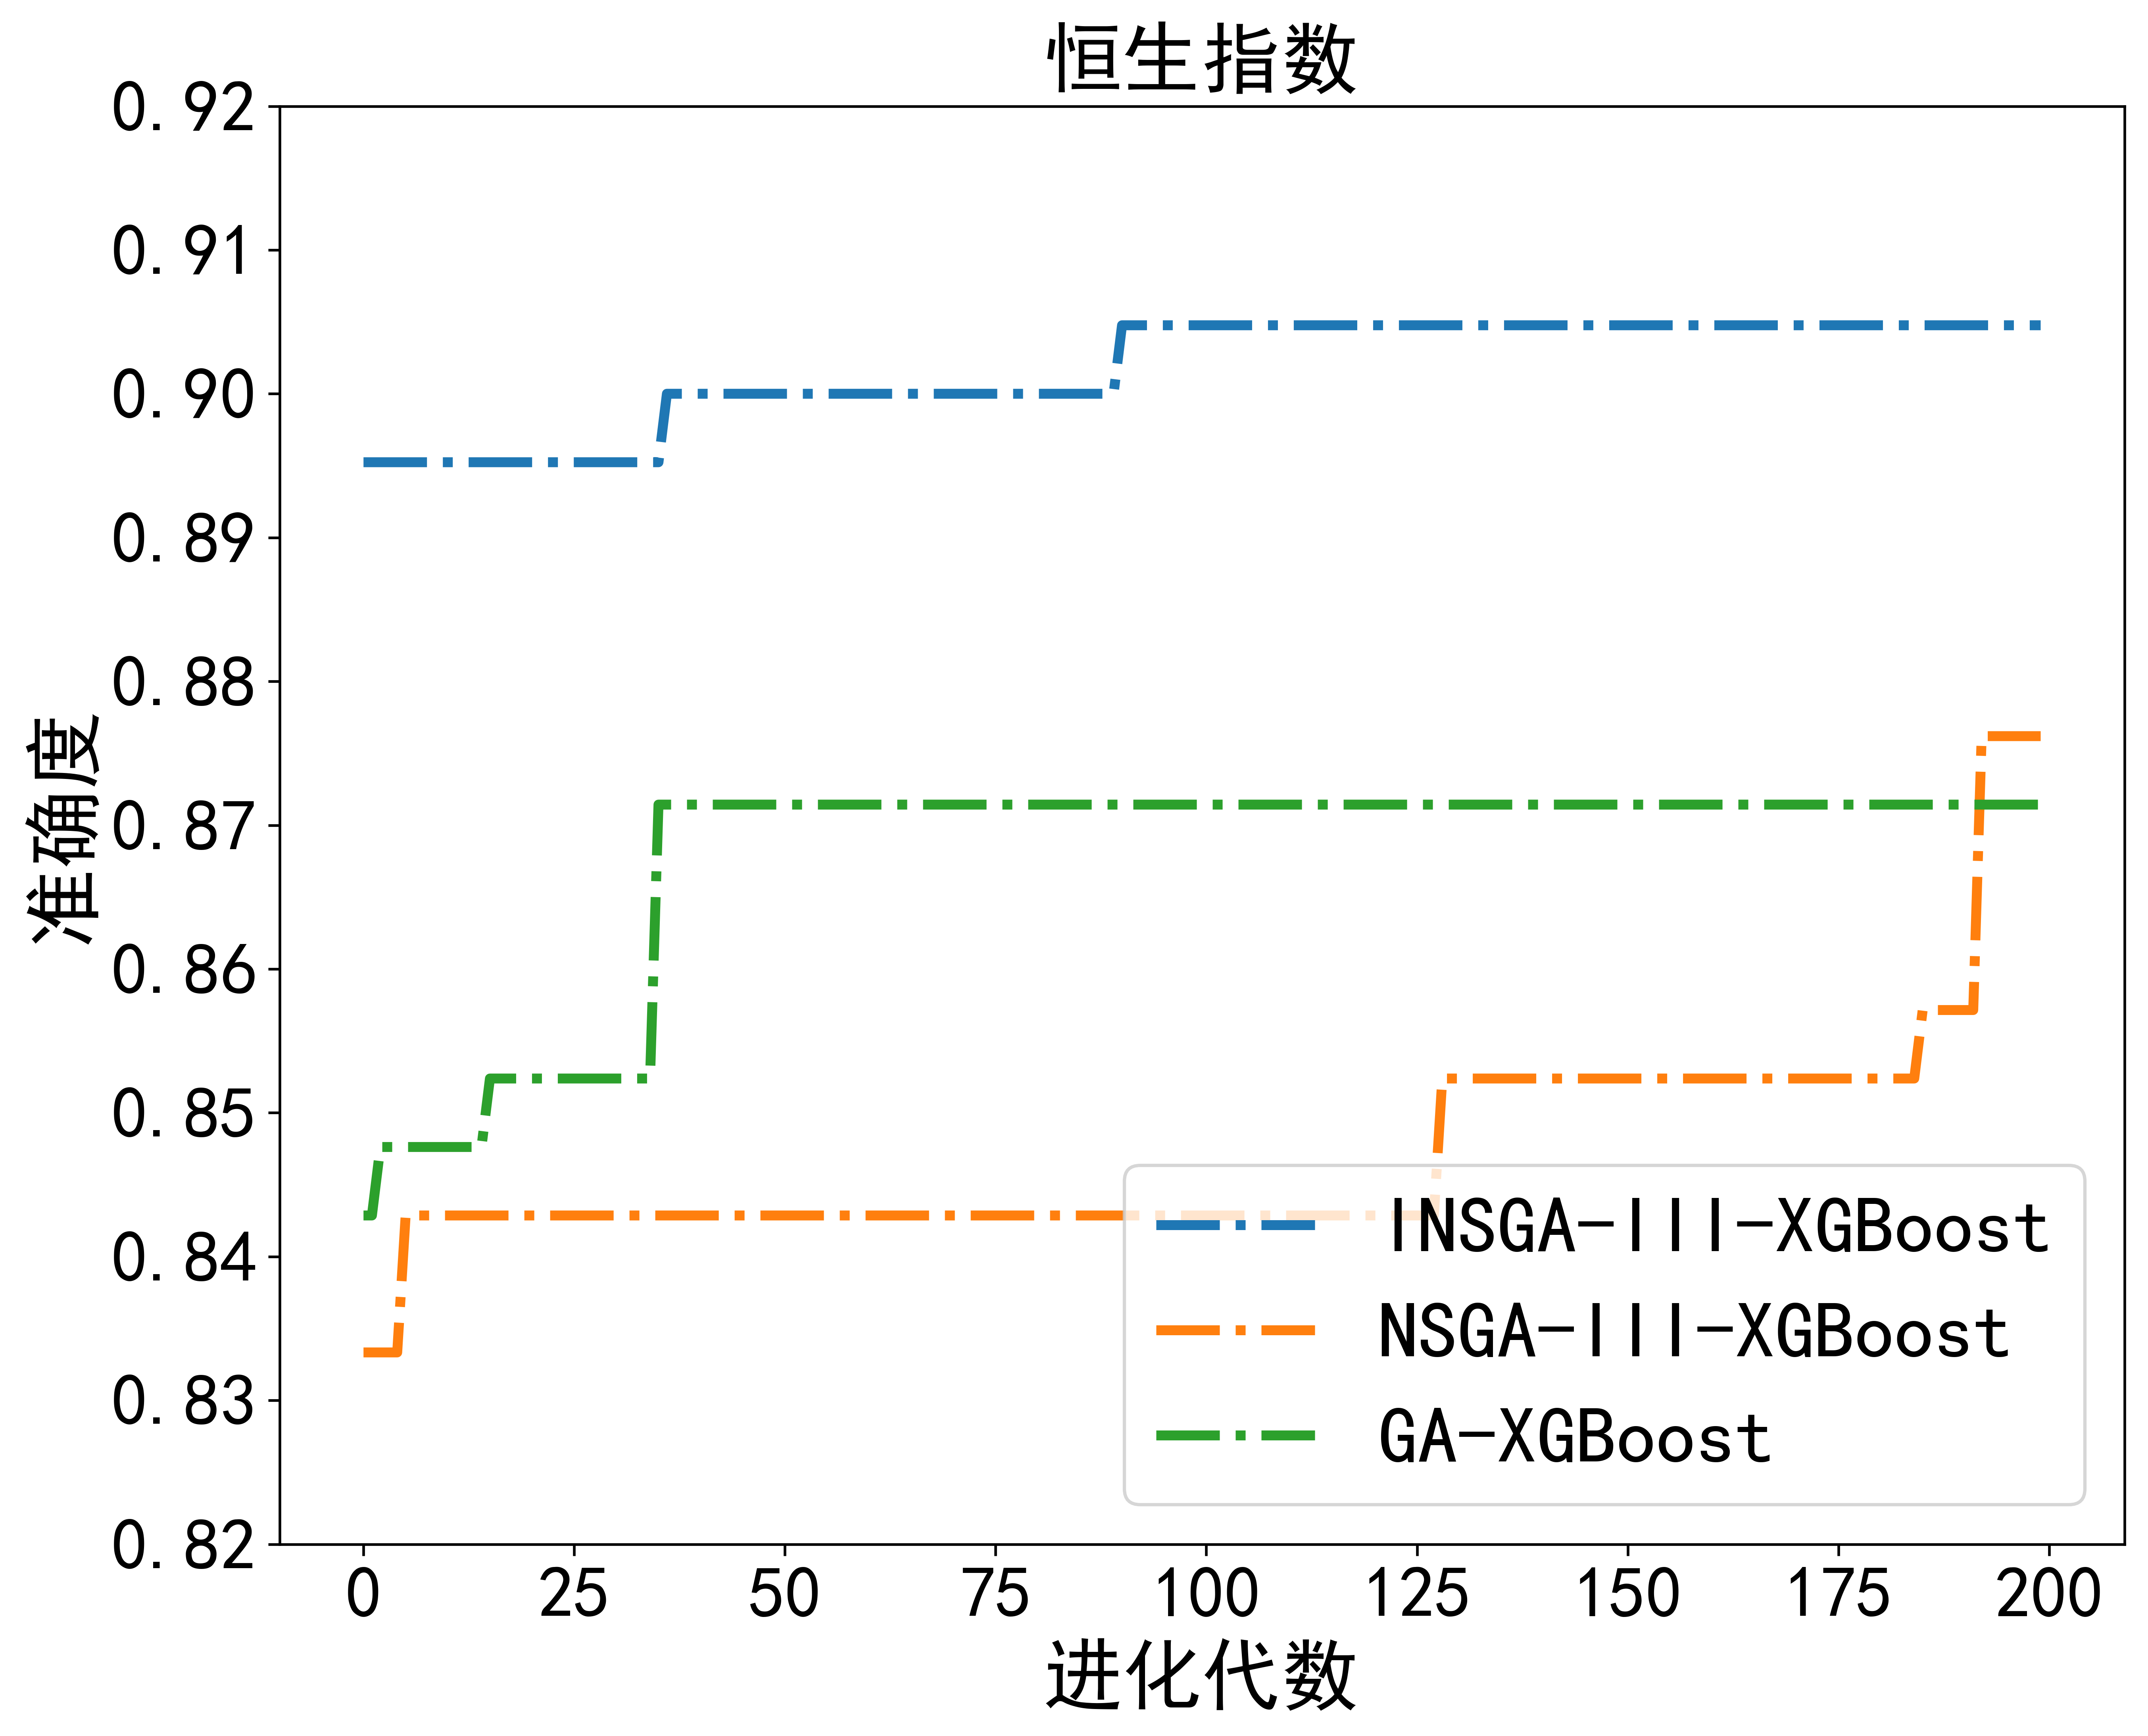

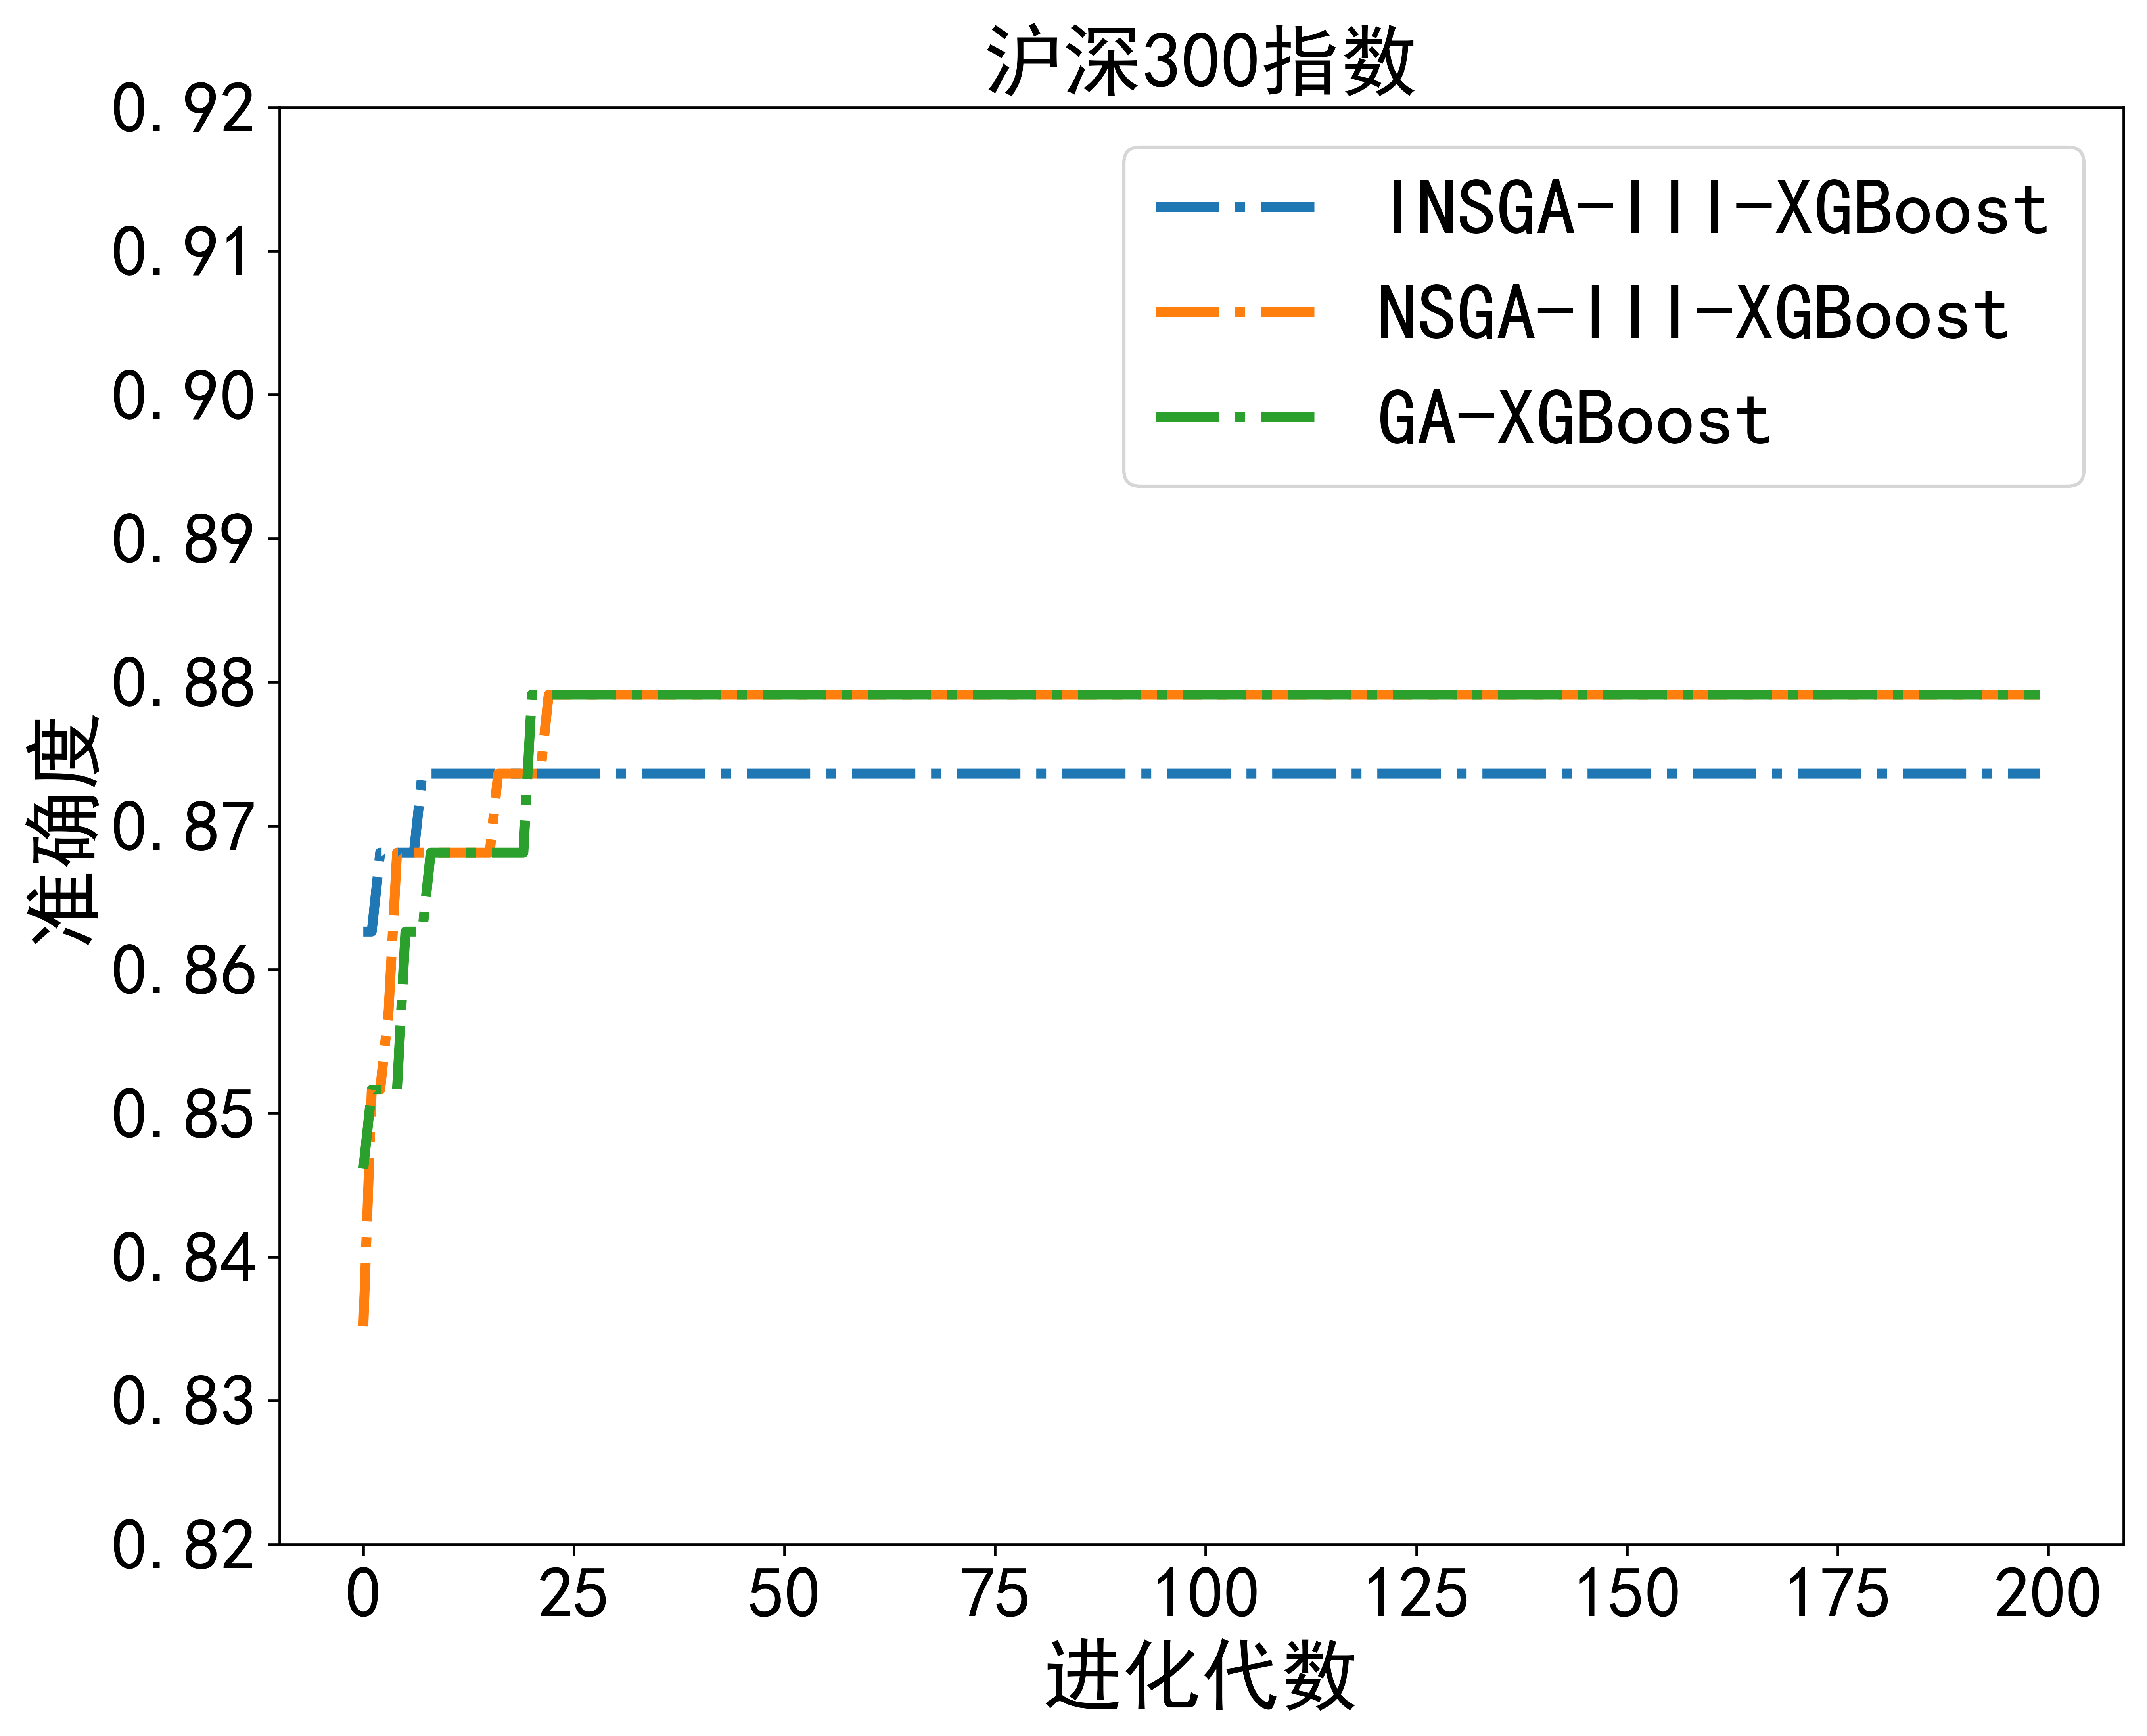

In [5]:
stock_list = ["DJIA","HangSeng","CSI300"]
# stock_list = ["HangSeng"]
for item in stock_list:
    save_fig_acc(item)

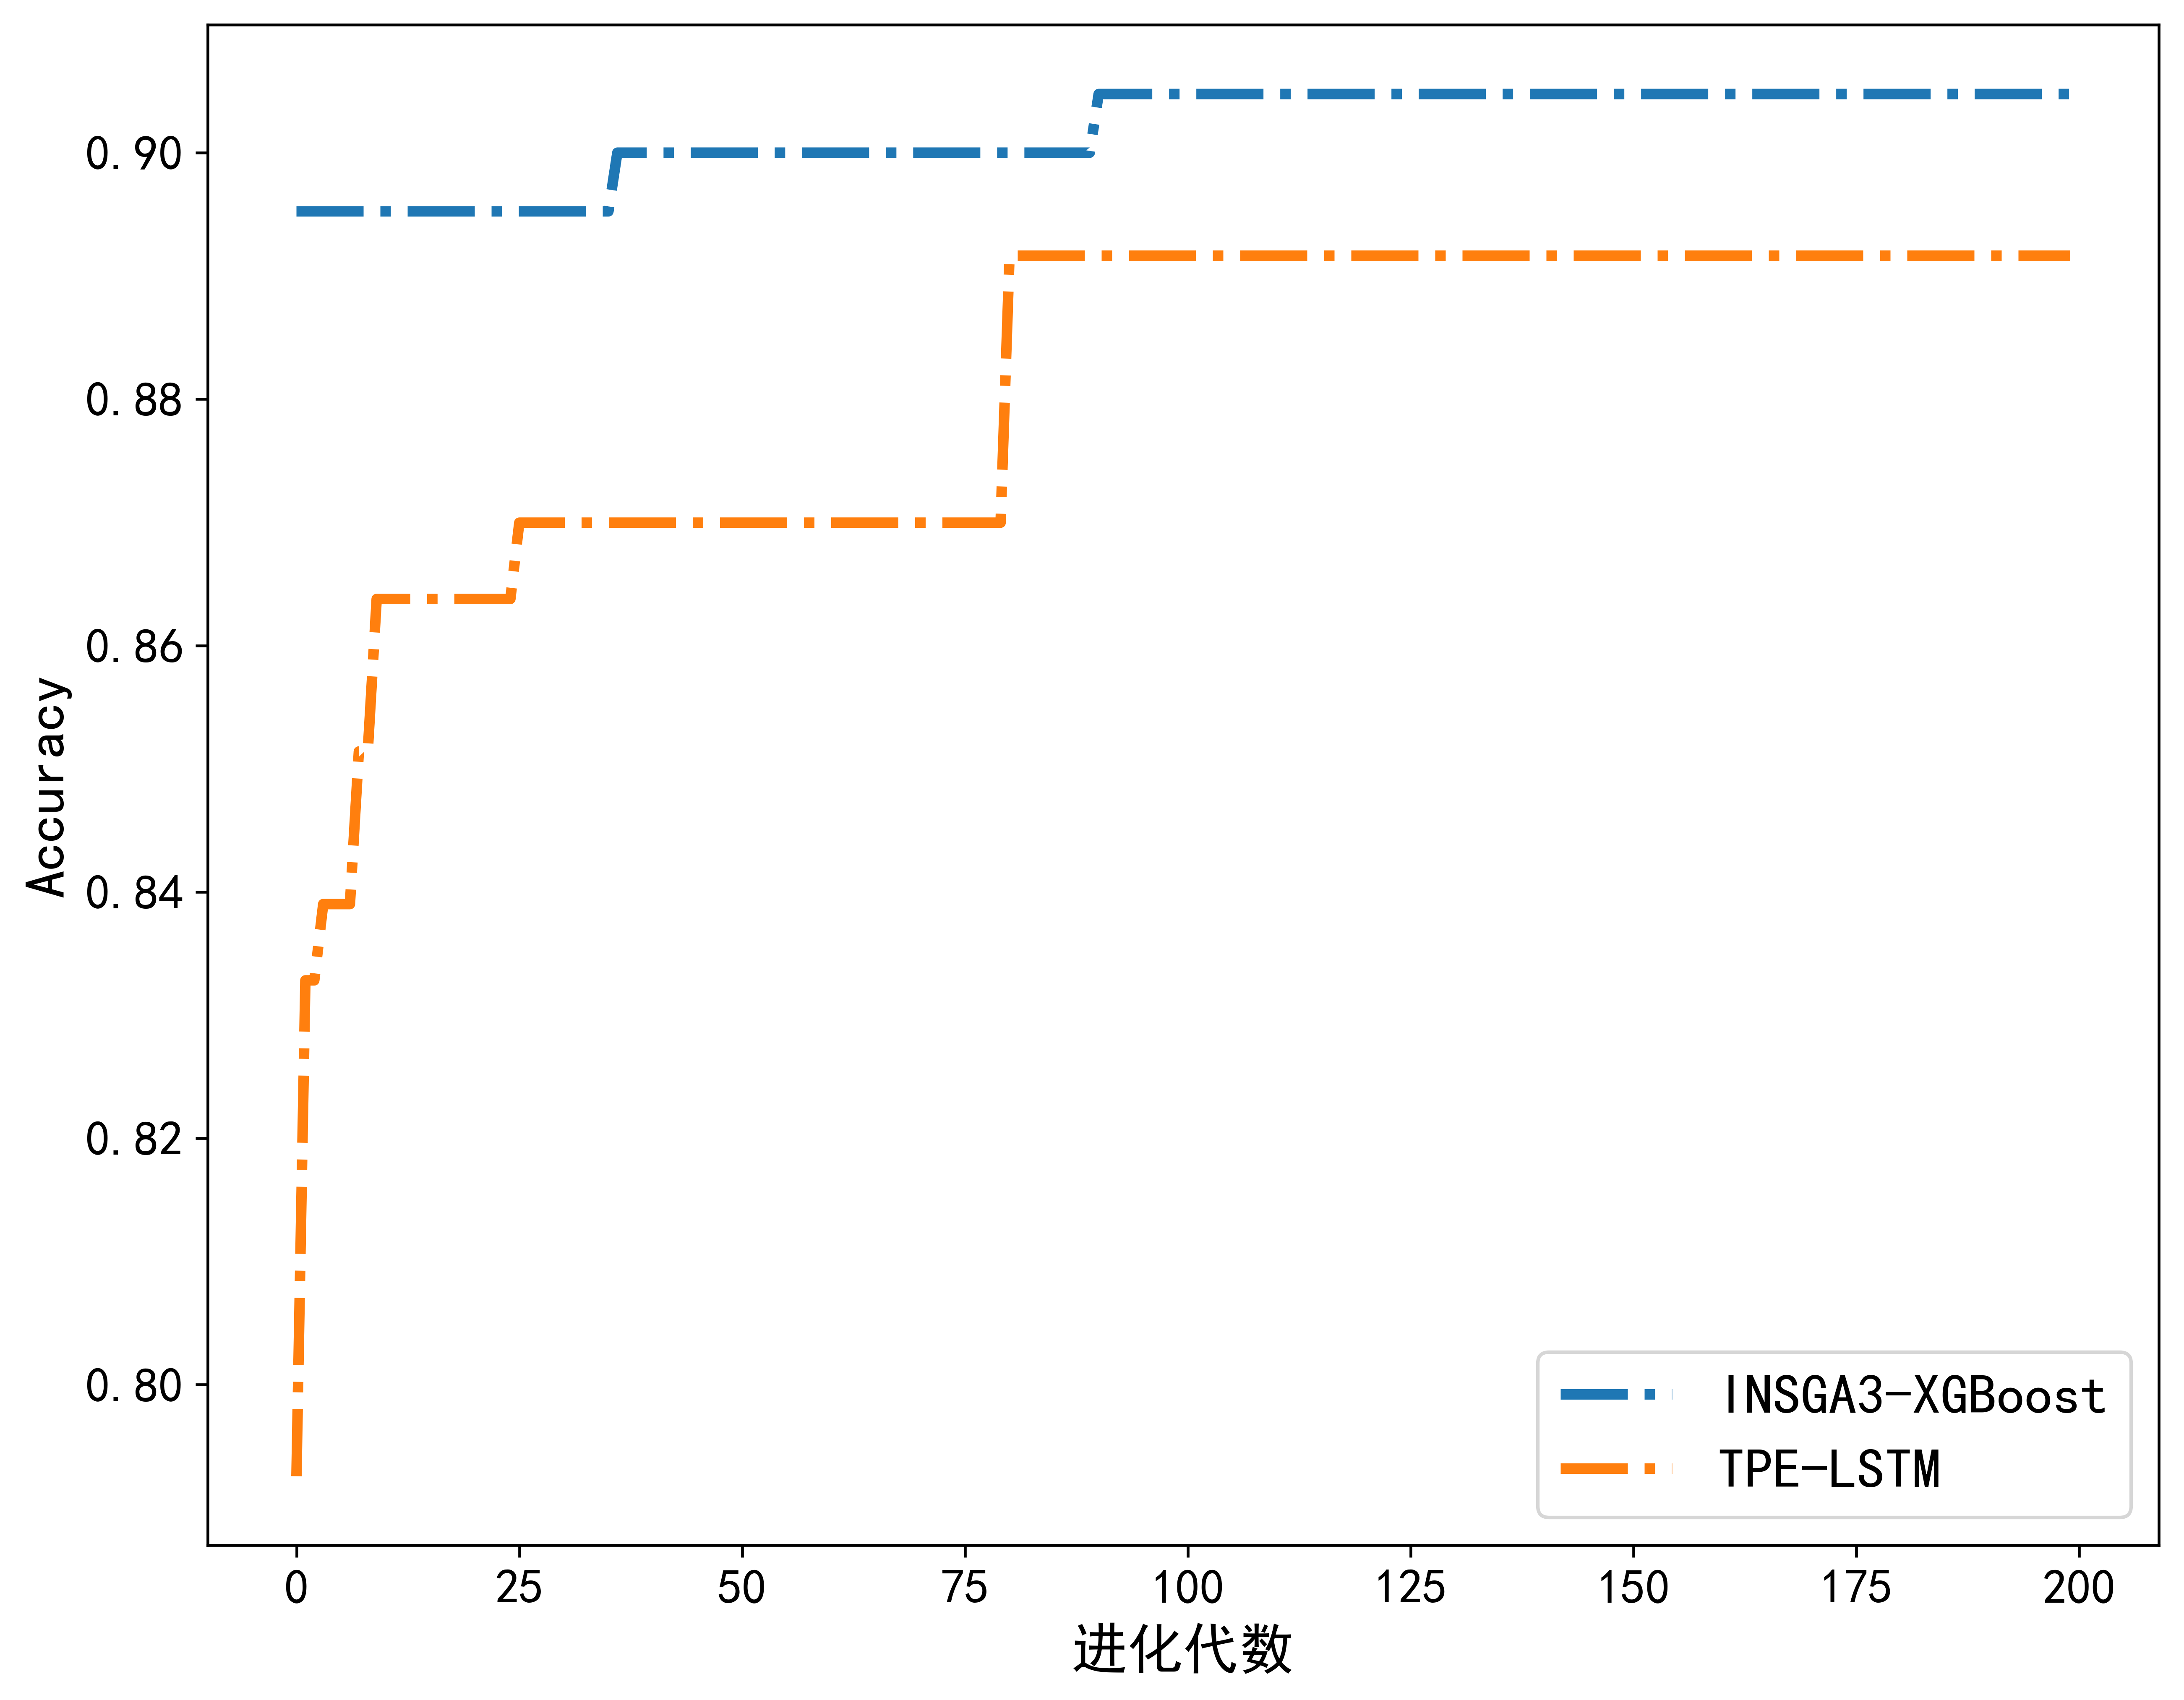

In [7]:
# 与TPE-LSTM比较
data = "HangSeng"
fig = plt.figure(figsize=(10,8),dpi=600)
imo = pd.read_csv("imo_fitness_"+data+".csv")
nn = pd.read_csv("NN收敛.csv")
plt.plot(range(200),imo.values[:,1],linestyle = "-.",linewidth=3,label='INSGA3-XGBoost')
plt.plot(range(200),nn.values[:,2],linestyle = "-.",linewidth=3,label='TPE-LSTM')
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel(u"进化代数",size=16)
plt.ylabel("Accuracy",size=16)
plt.legend(fontsize = 16)
fig.savefig("./实验结果/NNComp.pdf",dpi=600)